<a href="https://colab.research.google.com/github/opeeeeeeeeeeeeeeemi/Business-Analyst-Projects/blob/main/Apple_%26_Google_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

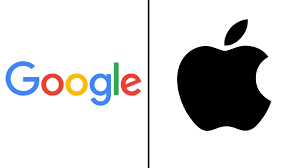


## **Summary**

Stock Market Comparison Analysis is a systematic examination that quantitatively evaluates multiple stocks or financial assets within the stock market. By analyzing the performance metrics of various stocks or assets, such as returns on investment, volatility, and correlations, it provides quantitative insights into how they have performed in comparison to each other and the broader market. This analysis enables investors, financial analysts, and decision-makers to make data-driven and informed investment decisions based on quantifiable evidence and trends.

## **Step 1:**

To initiate the task of Stock Market Comparison Analysis, I will retrieve the quantifiable stock price data of Apple and Google for the last quarter. I will employ the Yahoo Finance API to collect this data, ensuring accuracy and reliability. You can easily install the API by executing the following pip command on your terminal or command prompt:

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

## Step 2:

Next thing is to retrieve stock price data:

In [ ]:
# Here i define the tickers for Apple and Google
apple_ticker = 'AAPL'
google_ticker = 'GOOGL'

# Here i define the date range for the quarter
start_date = '2023-01-01'
end_date = '2023-10-15'

# Retrieve historical stock price data using yfinance
apple_data = yf.download(apple_ticker, start=start_date, end=end_date)
google_data = yf.download(google_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## **Step 3:**

Calculating the daily returns of Apple and Google in the stock market.

In [ ]:
# Calculatibg daily returns
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()

## **Step 4:**

Visualizing the daily returns for both of the stocks:

In [ ]:
# Create a figure to visualize the daily returns for noth stocks
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_data.index, y=apple_data['Daily_Return'],
                         mode='lines', name='Apple', line=dict(color='red')))
fig.add_trace(go.Scatter(x=google_data.index, y=google_data['Daily_Return'],
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Daily Returns for Apple and Google (Jan - Oct 2023)',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

## **Step 5:**

Analyzing the cumulative returns of Apple and Google from January to October 2023

In [ ]:
# Calculating the cumulative returns from Jan to Oct 2023
apple_cumulative_return = (1 + apple_data['Daily_Return']).cumprod() - 1
google_cumulative_return = (1 + google_data['Daily_Return']).cumprod() - 1

# Create a figure to visualize the cumulative returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_cumulative_return.index, y=apple_cumulative_return,
                         mode='lines', name='Apple', line=dict(color='red')))
fig.add_trace(go.Scatter(x=google_cumulative_return.index, y=google_cumulative_return,
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Cumulative Returns for Apple and Google (Jan - Oct 2023)',
                  xaxis_title='Date', yaxis_title='Cumulative Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

## **Step 6:**

I will analyze the volatility of Apple and Google:

In [ ]:
 # Calculating the historical volatility for both stocks (standard deviation of daily returns)
apple_volatility = apple_data['Daily_Return'].std()
google_volatility = google_data['Daily_Return'].std()

# Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Apple', 'Google'], y=[apple_volatility, google_volatility],
             text=[f'{apple_volatility:.4f}', f'{google_volatility:.4f}'],
             textposition='auto', marker=dict(color=['red', 'green']))

fig1.update_layout(title='Volatility Comparison (Last Quarter)',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show()

## **Step 7:**

Comparing the stock market of Google and Apple according to the stock market benchmark:

In [ ]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark

# Calculate daily returns for both stocks and the market
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

# Calculate Beta for Apple and Google
cov_apple = apple_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = market_data['Daily_Return'].var()

beta_apple = cov_apple / var_market

cov_google = google_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_google = cov_google / var_market

# Compare Beta values
if beta_apple > beta_google:
    conclusion = "Apple is more volatile (higher Beta) compared to Google."
else:
    conclusion = "Google is more volatile (higher Beta) compared to Apple."

# Print the conclusion
print("Beta for Apple:", beta_apple)
print("Beta for Google:", beta_google)
print(conclusion)

[*********************100%%**********************]  1 of 1 completed
Beta for Apple: 1.1592262202046746
Beta for Google: 1.4102427943536828
Google is more volatile (higher Beta) compared to Apple.


## **Conclusion**

This analysis allows me to delve into a methodical examination of multiple stocks or financial assets within the stock market. By meticulously analyzing the performance of these stocks or assets, I gain valuable insights into how they have fared compared to each other and the broader market.

The beauty of Stock Market Comparison Analysis lies in its ability to empower investors, financial analysts, and decision-makers to make well-informed investment decisions. Armed with this analysis, I can navigate the market with confidence, seeking out opportunities that align with my goals and aspirations.

I beleive the world of investing holds immense potential for growth and financial success. By leveraging tools like Stock Market Comparison Analysis, I am able to equip myself with the knowledge and insights needed to make informed choices that can help achieve my financial dreams.
